In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [3]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../../../../..")

print('Current location: ', os.getcwd())

Current location:  /Users/denys_herasymuk/UCU/4course_2term/Bachelor_Thesis/Code/fairness-variance


# Visualizations

In [4]:
from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.visualizations import preprocess_metrics, create_group_base_and_fair_models_box_plot

pip install 'aif360[LawSchoolGPA]'


## Initialize Configs

In [5]:
DB_COLLECTION_NAME = 'one_repair_lvl_many_models'
EXPERIMENT_SESSION_UUID = '0a3f8d21-048c-4599-95fa-a7fcfa14623c'
SENSITIVE_ATTRS = ['SEX', 'RAC1P', 'SEX&RAC1P']
SENSITIVE_ATTR_FOR_INTERVENTION = 'SEX&RAC1P'
MODEL_NAMES = ['ExponentiatedGradientReduction']

In [6]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [7]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [8]:
# Append Test_Set_Index to each result set for models
for model_name in models_metrics_dct.keys():
    models_metrics_dct[model_name]['Test_Set_Index'] = 0

In [9]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(19, 33)

In [10]:
models_metrics_dct[list(models_metrics_dct.keys())[0]][
    models_metrics_dct[list(models_metrics_dct.keys())[0]]['Experiment_Iteration'] == 'Exp_iter_1'
].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,Dataset_Split_Seed,...,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall,Test_Set_Index
0,Accuracy,ExponentiatedGradientReduction,{'sensitive_attr_for_intervention': 'SEX&RAC1P...,Folktables_GA_2018_Income,10,OK,2024-01-10 00:41:27.581,0a3f8d21-048c-4599-95fa-a7fcfa14623c,Exp_iter_1,100,...,1.000000,0.000000,0.831198,1.000000,0.000000,0.785678,1.000000,0.000000,0.807467,0
1,Aleatoric_Uncertainty,ExponentiatedGradientReduction,{'sensitive_attr_for_intervention': 'SEX&RAC1P...,Folktables_GA_2018_Income,10,OK,2024-01-10 00:41:27.581,0a3f8d21-048c-4599-95fa-a7fcfa14623c,Exp_iter_1,100,...,0.024705,0.057150,0.037282,0.031735,0.064599,0.030810,0.024094,0.055431,0.033908,0
2,Epistemic_Uncertainty,ExponentiatedGradientReduction,{'sensitive_attr_for_intervention': 'SEX&RAC1P...,Folktables_GA_2018_Income,10,OK,2024-01-10 00:41:27.581,0a3f8d21-048c-4599-95fa-a7fcfa14623c,Exp_iter_1,100,...,0.113258,0.303259,0.160580,0.121318,0.353912,0.139836,0.104583,0.269067,0.149765,0
3,F1,ExponentiatedGradientReduction,{'sensitive_attr_for_intervention': 'SEX&RAC1P...,Folktables_GA_2018_Income,10,OK,2024-01-10 00:41:27.581,0a3f8d21-048c-4599-95fa-a7fcfa14623c,Exp_iter_1,100,...,1.000000,0.000000,0.688592,1.000000,0.000000,0.717845,1.000000,0.000000,0.706265,0
4,FNR,ExponentiatedGradientReduction,{'sensitive_attr_for_intervention': 'SEX&RAC1P...,Folktables_GA_2018_Income,10,OK,2024-01-10 00:41:27.581,0a3f8d21-048c-4599-95fa-a7fcfa14623c,Exp_iter_1,100,...,0.000000,1.000000,0.327309,0.000000,1.000000,0.336239,0.000000,1.000000,0.332821,0
5,FPR,ExponentiatedGradientReduction,{'sensitive_attr_for_intervention': 'SEX&RAC1P...,Folktables_GA_2018_Income,10,OK,2024-01-10 00:41:27.581,0a3f8d21-048c-4599-95fa-a7fcfa14623c,Exp_iter_1,100,...,0.000000,1.000000,0.107941,0.000000,1.000000,0.129340,0.000000,1.000000,0.118007,0
6,IQR,ExponentiatedGradientReduction,{'sensitive_attr_for_intervention': 'SEX&RAC1P...,Folktables_GA_2018_Income,10,OK,2024-01-10 00:41:27.581,0a3f8d21-048c-4599-95fa-a7fcfa14623c,Exp_iter_1,100,...,0.062322,0.185304,0.093325,0.066955,0.223175,0.080023,0.056458,0.166407,0.086390,0
7,Jitter,ExponentiatedGradientReduction,{'sensitive_attr_for_intervention': 'SEX&RAC1P...,Folktables_GA_2018_Income,10,OK,2024-01-10 00:41:27.581,0a3f8d21-048c-4599-95fa-a7fcfa14623c,Exp_iter_1,100,...,0.062149,0.170774,0.088022,0.065550,0.198680,0.078500,0.057943,0.153858,0.083058,0
8,Label_Stability,ExponentiatedGradientReduction,{'sensitive_attr_for_intervention': 'SEX&RAC1P...,Folktables_GA_2018_Income,10,OK,2024-01-10 00:41:27.581,0a3f8d21-048c-4599-95fa-a7fcfa14623c,Exp_iter_1,100,...,0.919727,0.775248,0.885682,0.915416,0.739274,0.897698,0.925391,0.796181,0.891947,0
9,Mean_Prediction,ExponentiatedGradientReduction,{'sensitive_attr_for_intervention': 'SEX&RAC1P...,Folktables_GA_2018_Income,10,OK,2024-01-10 00:41:27.581,0a3f8d21-048c-4599-95fa-a7fcfa14623c,Exp_iter_1,100,...,0.691044,0.606215,0.723002,0.761986,0.531041,0.649277,0.656702,0.622058,0.684567,0


In [11]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct_for_mult_test_sets()

In [12]:
exp_group_metrics_dct = exp_composer.compose_group_metrics_for_mult_test_sets(exp_subgroup_metrics_dct)

## Figure 1. Subgroup boxplots.

In [13]:
melted_all_subgroup_metrics_per_model_dct, melted_all_group_metrics_per_model_dct = \
    preprocess_metrics(exp_subgroup_metrics_dct, exp_group_metrics_dct)

In [14]:
vals_to_replace = {
    'Model_Name': {
        'LGBMClassifier': 'LGBM',
        'LogisticRegression': 'LR',
        'RandomForestClassifier': 'RF',
        'MLPClassifier': 'MLP'
    }
}

<Figure size 1200x600 with 0 Axes>

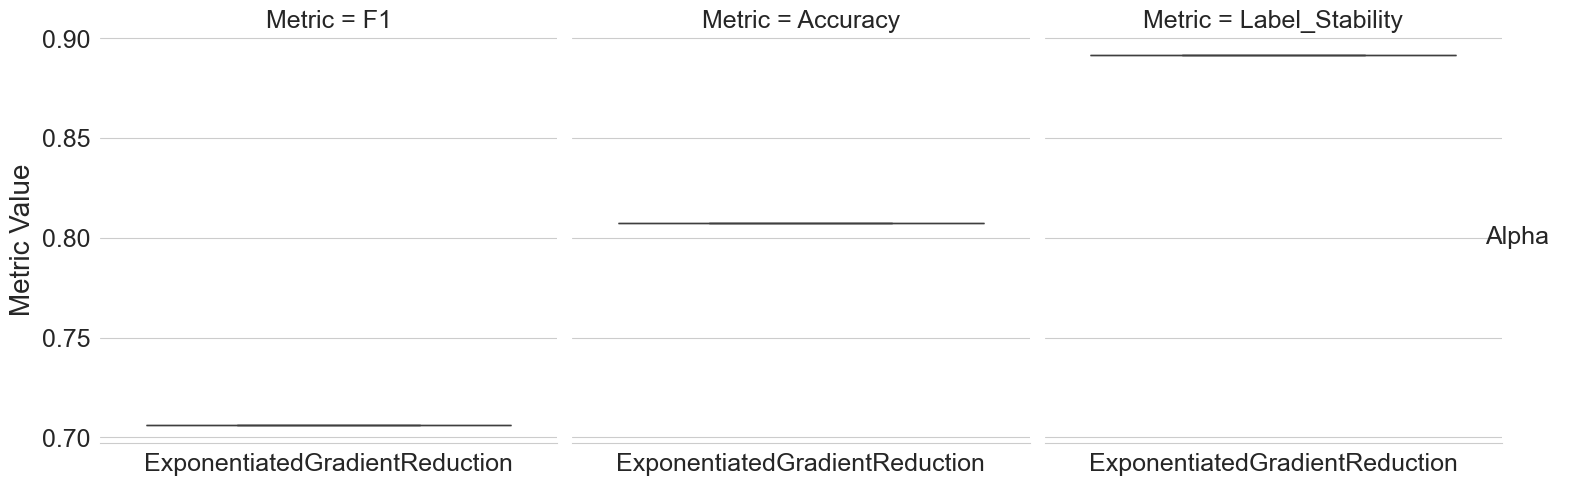

In [15]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           # ylim=(0.75, 1.0),
                                           metric_names=['F1', 'Accuracy', 'Label_Stability'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

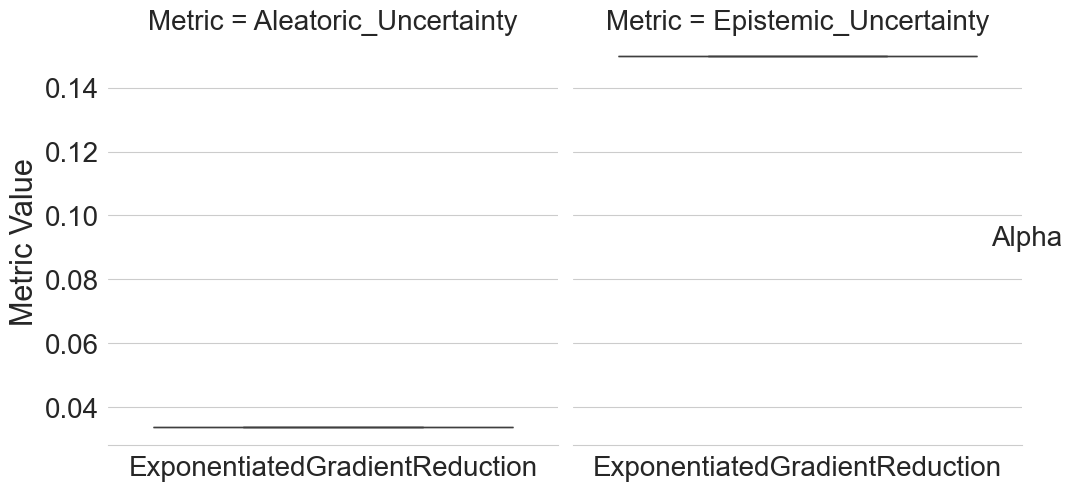

In [16]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           # ylim=(0.75, 1.0),
                                           metric_names=['Aleatoric_Uncertainty', 'Epistemic_Uncertainty'],
                                           vals_to_replace=vals_to_replace)

## Figure 2. Create group boxplots.

<Figure size 1200x600 with 0 Axes>

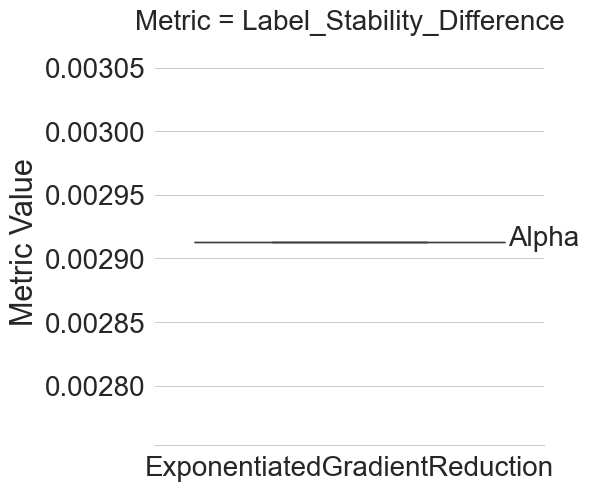

In [17]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group=SENSITIVE_ATTR_FOR_INTERVENTION,
                                           metric_names=['Label_Stability_Difference'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

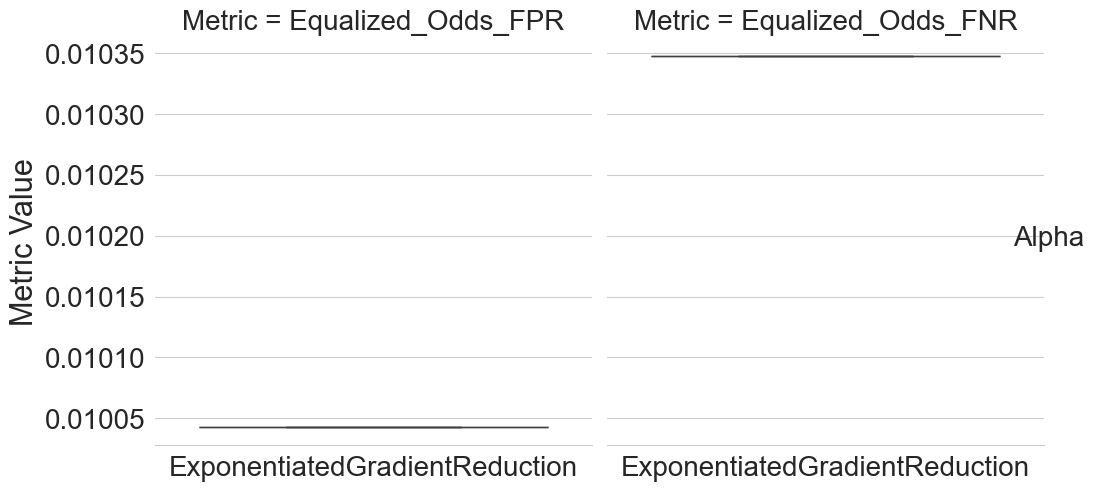

In [18]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group=SENSITIVE_ATTR_FOR_INTERVENTION,
                                           metric_names=['Equalized_Odds_FPR', 'Equalized_Odds_FNR'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

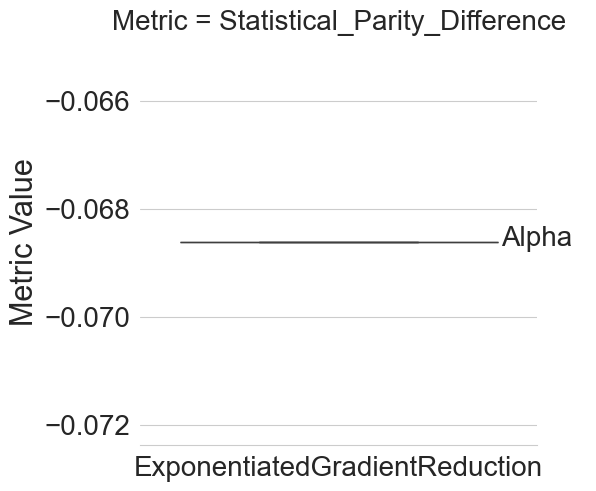

In [19]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group=SENSITIVE_ATTR_FOR_INTERVENTION,
                                           metric_names=['Statistical_Parity_Difference'],
                                           vals_to_replace=vals_to_replace)